In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [184]:
rsocket_db_mem = pd.read_csv("../Rsocket/DB/mem.csv")
rsocket_db_thread = pd.read_csv("../Rsocket/DB/thread.csv")
rsocket_db_cpu = pd.read_csv("../Rsocket/DB/cpu.csv")
rsocket_db_throughput = pd.read_csv("../Rsocket/DB/throughput.csv")

grpc_db_mem = pd.read_csv("../gRPC/DB/mem.csv")
grpc_db_thread = pd.read_csv("../gRPC/DB/thread.csv")
grpc_db_cpu = pd.read_csv("../gRPC/DB/cpu.csv")
grpc_db_throughput = pd.read_csv("../gRPC/DB/throughput.csv")

db_thread_stats = ["10 Threads", "20 Threads", "50 Threads", "100 Threads"]

rsocket_sized_mem = pd.read_csv("../Rsocket/Sized/mem.csv")
rsocket_sized_thread = pd.read_csv("../Rsocket/Sized/thread.csv")
rsocket_sized_cpu = pd.read_csv("../Rsocket/Sized/cpu.csv")
rsocket_sized_throughput = pd.read_csv("../Rsocket/Sized/throughput.csv")

grpc_sized_mem = pd.read_csv("../gRPC/Sized/mem.csv")
grpc_sized_thread = pd.read_csv("../gRPC/Sized/thread.csv")
grpc_sized_cpu = pd.read_csv("../gRPC/Sized/cpu.csv")
grpc_sized_throughput = pd.read_csv("../gRPC/Sized/throughput.csv")

rsocket_large_sized_mem = pd.read_csv("../Rsocket/LargeSized/mem.csv")
rsocket_large_sized_thread = pd.read_csv("../Rsocket/LargeSized/thread.csv")
rsocket_large_sized_cpu = pd.read_csv("../Rsocket/LargeSized/cpu.csv")
rsocket_large_sized_throughput = pd.read_csv("../Rsocket/LargeSized/throughput.csv")

grpc_large_sized_mem = pd.read_csv("../gRPC/LargeSized/mem.csv")
grpc_large_sized_thread = pd.read_csv("../gRPC/LargeSized/thread.csv")
grpc_large_sized_cpu = pd.read_csv("../gRPC/LargeSized/cpu.csv")
grpc_large_sized_throughput = pd.read_csv("../gRPC/LargeSized/throughput.csv")

rsocket_request_mem = pd.read_csv("../Rsocket/Request/mem.csv")
rsocket_request_thread = pd.read_csv("../Rsocket/Request/thread.csv")
rsocket_request_cpu = pd.read_csv("../Rsocket/Request/cpu.csv")
rsocket_request_throughput = pd.read_csv("../Rsocket/Request/throughput.csv")

grpc_request_mem = pd.read_csv("../gRPC/Request/mem.csv")
grpc_request_thread = pd.read_csv("../gRPC/Request/thread.csv")
grpc_request_cpu = pd.read_csv("../gRPC/Request/cpu.csv")
grpc_request_throughput = pd.read_csv("../gRPC/Request/throughput.csv")

rsocket_clients_mem = pd.read_csv("../Rsocket/ClientStreaming/mem.csv")
rsocket_clients_thread = pd.read_csv("../Rsocket/ClientStreaming/thread.csv")
rsocket_clients_cpu = pd.read_csv("../Rsocket/ClientStreaming/cpu.csv")
rsocket_clients_throughput = pd.read_csv("../Rsocket/ClientStreaming/throughput.csv")

grpc_clients_mem = pd.read_csv("../gRPC/ClientStreaming/mem.csv")
grpc_clients_thread = pd.read_csv("../gRPC/ClientStreaming/thread.csv")
grpc_clients_cpu = pd.read_csv("../gRPC/ClientStreaming/cpu.csv")
grpc_clients_throughput = pd.read_csv("../gRPC/ClientStreaming/throughput.csv")

rsocket_db_clients_mem = pd.read_csv("../Rsocket/DBCS/mem.csv")
rsocket_db_clients_thread = pd.read_csv("../Rsocket/DBCS/thread.csv")
rsocket_db_clients_cpu = pd.read_csv("../Rsocket/DBCS/cpu.csv")
rsocket_db_clients_throughput = pd.read_csv("../Rsocket/DBCS/throughput.csv")

grpc_db_clients_mem = pd.read_csv("../gRPC/DbClientStreaming/mem.csv")
grpc_db_clients_thread = pd.read_csv("../gRPC/DbClientStreaming/thread.csv")
grpc_db_clients_cpu = pd.read_csv("../gRPC/DbClientStreaming/cpu.csv")
grpc_db_clients_throughput = pd.read_csv("../gRPC/DbClientStreaming/throughput.csv")


In [185]:
grpc_db_throughput.describe()

,Threads,Samples,Score,Score Error (99.9%)
count,4.000000,4.0,4.000000,4.000000
mean,45.000000,3.0,470.879418,252.982502
std,40.414519,0.0,68.587215,174.007221
min,10.000000,3.0,386.294643,63.403808
25%,17.500000,3.0,435.698253,127.198536
50%,35.000000,3.0,474.734789,264.731109
75%,62.500000,3.0,509.915954,390.515075
max,100.000000,3.0,547.753452,419.063985


In [186]:
def scale_values(values: list, new_min: float, new_max: float):
    values = np.array(values)

    min_val = np.min(values)
    max_val = np.max(values)

    factor1 = new_min / min_val
    factor2 = new_max / max_val

    return (factor1 + factor2) / 2

In [187]:
def process_time_values(df: pd.DataFrame, time_column: str = "Time"):
    time_values = df[time_column] - df[time_column].min()
    time_values = time_values * 1000000
    time_values = time_values.apply(lambda x: int(x))
    return time_values

In [188]:
def plot_through_put_line(
    time_values,
    rsocket_throughput: pd.DataFrame = None,
    grpc_throughput: pd.DataFrame = None,
    y_max=None,
    y_min=None,
    labels=None,
):
    x_max = max(time_values)
    x_min = min(time_values)

    split = np.linspace(x_min, x_max, 5)
    ranges = list(zip(split[0:-1], split[1:]))
    x_pos_throughput = [range[0] + (range[1] - range[0]) / 2 for range in ranges]

    rsocket_throughput_values = rsocket_throughput["Score"]
    grpc_throughput_values = grpc_throughput["Score"]

    factor = 1

    if y_max is not None and x_max is not None:
        factor = scale_values(rsocket_throughput_values, 1.2 * y_min, 0.7 * y_max)

    plt.plot(
        x_pos_throughput,
        list(map(lambda x: factor * x, rsocket_throughput_values)),
        color="red",
        linestyle="--",
        marker = "o",
        label="RSocket Troughput",
    )
    plt.plot(
        x_pos_throughput,
        list(map(lambda x: factor * x, grpc_throughput_values)),
        color="blue",
        linestyle="--",
        marker='o',
        label="gRPC Throughput",
    )

    if labels == None:
        plt.xticks(x_pos_throughput)
    else:
        plt.xticks(x_pos_throughput, labels)

In [189]:
def draw_throughput_chart(
    rsocket_df: pd.DataFrame, grpc_df: pd.DataFrame, thread_stats
):
    rsocket_throughput_values = rsocket_df["Score"]
    grpc_throughput_values = grpc_df["Score"]

    width = 0.35
    plt.bar(
        [i - width / 2 for i in range(len(rsocket_throughput_values))],
        rsocket_throughput_values,
        color="red",
        label="RSocket",
        width=width,
        alpha=0.7,
    )
    plt.bar(
        [i + width / 2 for i in range(len(grpc_throughput_values))],
        grpc_throughput_values,
        color="blue",
        label="gRPC",
        width=width,
        alpha=0.7,
    )

    plt.xticks([i for i in range(len(rsocket_throughput_values))], thread_stats)
    plt.xlabel("Num of concurrent clients")
    plt.ylabel("Throughput")
    plt.legend()
    plt.show()

In [190]:
def draw_cpu_chart(
    rsocket_df: pd.DataFrame,
    grpc_df: pd.DataFrame,
    rsocket_throughput: pd.DataFrame = None,
    grpc_throughput: pd.DataFrame = None,
    throughput_labels=None,
    title="CPU Usage chart"
):
    rsocket_time_values = process_time_values(rsocket_df)

    rsocket_cpu_coordinates_x = list(rsocket_time_values)
    rsocket_cpu_coordinates_y = list(rsocket_df["CPU Usage"])
    rsocket_cpu_coordinates_y_s = np.convolve(
        rsocket_cpu_coordinates_y, np.ones(3) / 3, mode="same"
    )

    plt.plot(
        rsocket_cpu_coordinates_x,
        rsocket_cpu_coordinates_y,
        color="red",
        label="RSocket",
        alpha=0.6,
    )

    grpc_time_values = process_time_values(grpc_df)

    grpc_cpu_coordinates_x = list(grpc_time_values)
    grpc_cpu_coordinates_y = list(grpc_df["CPU Usage"])
    grpc_cpu_coordinates_y_s = np.convolve(
        grpc_cpu_coordinates_y, np.ones(3) / 3, mode="same"
    )

    plt.plot(
        grpc_cpu_coordinates_x,
        grpc_cpu_coordinates_y,
        color="blue",
        label="gRPC",
        alpha=0.6,
    )

    if grpc_throughput is not None and rsocket_throughput is not None:
        plot_through_put_line(
            grpc_time_values,
            rsocket_throughput,
            grpc_throughput,
            max(grpc_cpu_coordinates_y),
            min(grpc_cpu_coordinates_y),
            labels=throughput_labels,
        )

    plt.title(title)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("CPU Usage")
    plt.show()

In [191]:
def draw_thread_chart(
    rsocket_df: pd.DataFrame,
    grpc_df: pd.DataFrame,
    rsocket_throughput: pd.DataFrame = None,
    grpc_throughput: pd.DataFrame = None,
    throughput_labels=None,
    title = "Live Thread Chart"
):
    rsocket_time_values = process_time_values(rsocket_df)

    rsocket_thread_coordinates_x = list(rsocket_time_values)
    rsocket_thread_coordinates_y = list(rsocket_df["Live threads"])
    rsocket_thread_coordinates_y_s = np.convolve(
        rsocket_thread_coordinates_y, np.ones(3) / 3, mode="same"
    )

    grpc_time_values = process_time_values(grpc_df)

    grpc_thread_coordinates_x = list(grpc_time_values)
    grpc_thread_coordinates_y = list(grpc_df["Live threads"])
    grpc_thread_coordinates_y_s = np.convolve(
        grpc_thread_coordinates_y, np.ones(3) / 3, mode="same"
    )

    plt.plot(
        grpc_thread_coordinates_x,
        grpc_thread_coordinates_y,
        color="blue",
        label="gRPC",
        alpha=0.6,
    )
    plt.plot(
        rsocket_thread_coordinates_x,
        rsocket_thread_coordinates_y,
        color="red",
        label="RSocket",
        alpha=0.6,
    )

    if grpc_throughput is not None and rsocket_throughput is not None:
        plot_through_put_line(
            grpc_time_values,
            rsocket_throughput,
            grpc_throughput,
            max(grpc_thread_coordinates_y),
            min(grpc_thread_coordinates_y),
            labels=throughput_labels,
        )

    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Live threads")
    plt.title(title)
    plt.show()

In [192]:
def draw_mem_chart(
    rsocket_df: pd.DataFrame,
    grpc_df: pd.DataFrame,
    window: int = 9,
    rsocket_throughput: pd.DataFrame = None,
    grpc_throughput: pd.DataFrame = None,
    throughput_labels=None,
    title="Memory Usage Chart"
):
    rsocket_time_values = process_time_values(rsocket_df)

    rsocket_mem_coordinates_x = list(rsocket_time_values)
    rsocket_mem_coordinates_y = list(rsocket_df["Used"])
    rsocket_mem_coordinates_y_s = np.convolve(
        rsocket_mem_coordinates_y, np.ones(window) / window, mode="same"
    )

    grpc_time_values = process_time_values(grpc_df)

    grpc_mem_coordinates_x = list(grpc_time_values)
    grpc_mem_coordinates_y = list(grpc_df["Used"])
    grpc_mem_coordinates_y_s = np.convolve(
        grpc_mem_coordinates_y, np.ones(window) / window, mode="same"
    )

    plt.plot(
        grpc_mem_coordinates_x,
        grpc_mem_coordinates_y_s,
        color="blue",
        label="gRPC",
        alpha=0.6,
    )
    plt.plot(
        rsocket_mem_coordinates_x,
        rsocket_mem_coordinates_y_s,
        color="red",
        label="RSocket",
        alpha=0.6,
    )

    if grpc_throughput is not None and rsocket_throughput is not None:
        plot_through_put_line(
            grpc_time_values,
            rsocket_throughput,
            grpc_throughput,
            max(grpc_mem_coordinates_y),
            min(grpc_mem_coordinates_y),
            labels=throughput_labels,
        )

    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Used Memory")
    plt.title(title)
    plt.show()

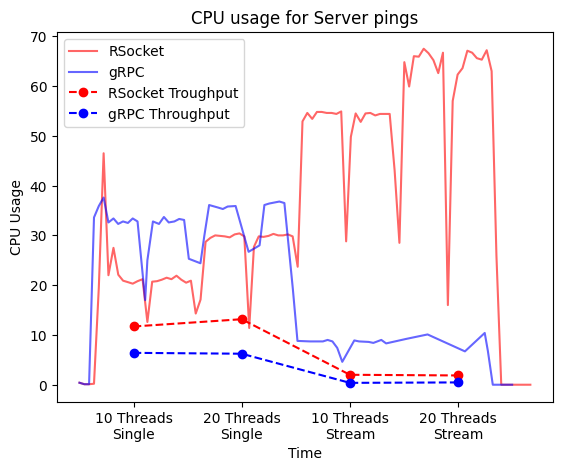

In [193]:
draw_cpu_chart(
    rsocket_request_cpu,
    grpc_request_cpu,
    grpc_throughput=grpc_request_throughput,
    rsocket_throughput=rsocket_request_throughput,
    throughput_labels=[
        "10 Threads\nSingle",
        "20 Threads\nSingle",
        "10 Threads\nStream",
        "20 Threads\nStream",
    ],
    title = "CPU usage for Server pings"
)

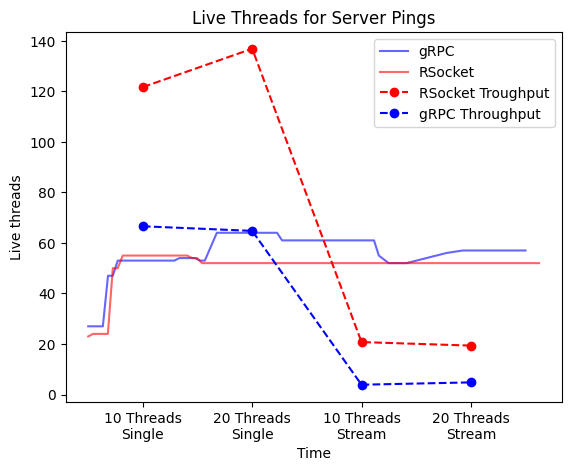

In [194]:
draw_thread_chart(
    rsocket_request_thread,
    grpc_request_thread,
    grpc_throughput=grpc_request_throughput,
    rsocket_throughput=rsocket_request_throughput,
    throughput_labels=[
        "10 Threads\nSingle",
        "20 Threads\nSingle",
        "10 Threads\nStream",
        "20 Threads\nStream",
    ],
    title="Live Threads for Server Pings"
)

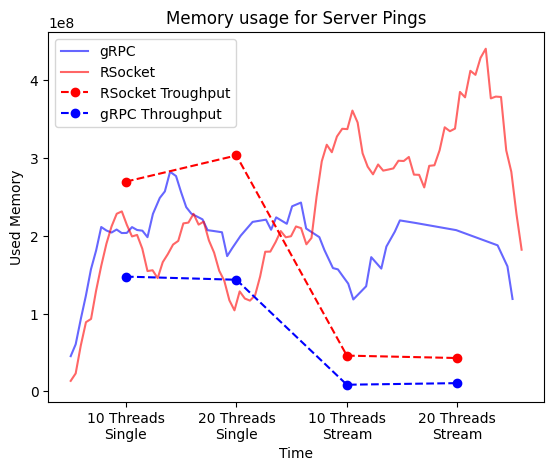

In [195]:
draw_mem_chart(
    rsocket_request_mem,
    grpc_request_mem,
    grpc_throughput=grpc_request_throughput,
    rsocket_throughput=rsocket_request_throughput,
    throughput_labels=[
        "10 Threads\nSingle",
        "20 Threads\nSingle",
        "10 Threads\nStream",
        "20 Threads\nStream",
    ],
    title="Memory usage for Server Pings"
)

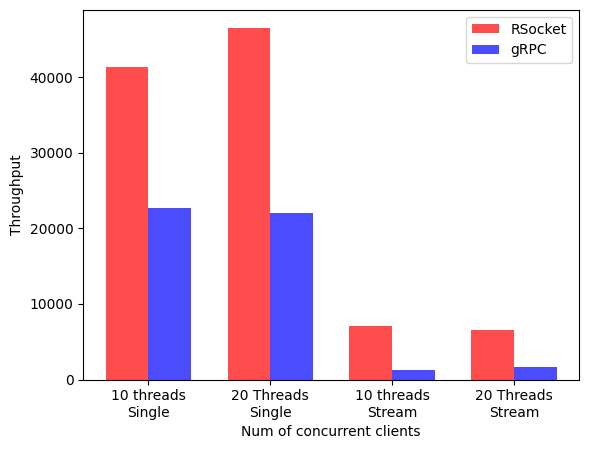

In [196]:
draw_throughput_chart(
    rsocket_request_throughput,
    grpc_request_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
)

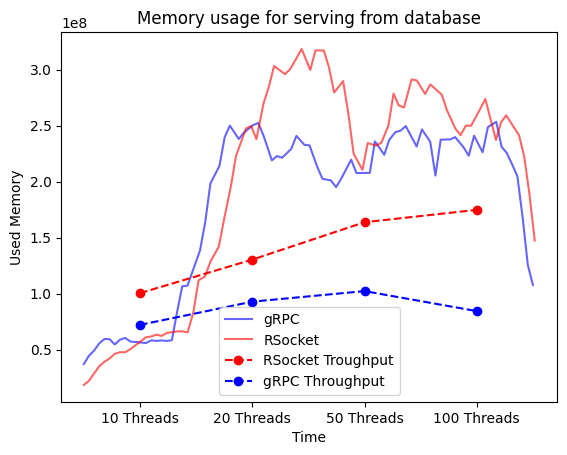

In [197]:
draw_mem_chart(
    rsocket_db_mem,
    grpc_db_mem,
    grpc_throughput=grpc_db_throughput,
    rsocket_throughput=rsocket_db_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Memory usage for serving from database"
)

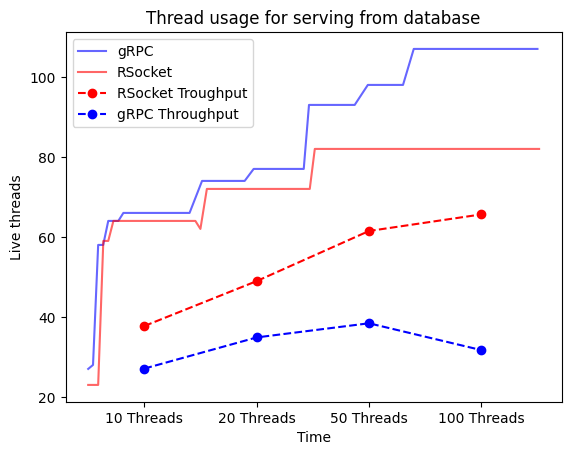

In [198]:
draw_thread_chart(
    rsocket_db_thread,
    grpc_db_thread,
    grpc_throughput=grpc_db_throughput,
    rsocket_throughput=rsocket_db_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Thread usage for serving from database"
)

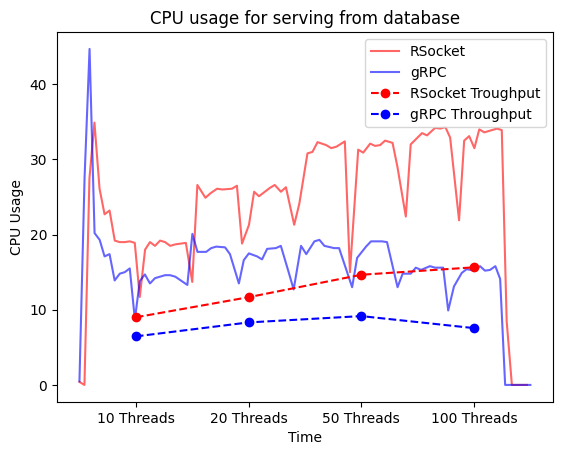

In [199]:
draw_cpu_chart(
    rsocket_db_cpu,
    grpc_db_cpu,
    grpc_throughput=grpc_db_throughput,
    rsocket_throughput=rsocket_db_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="CPU usage for serving from database"

)

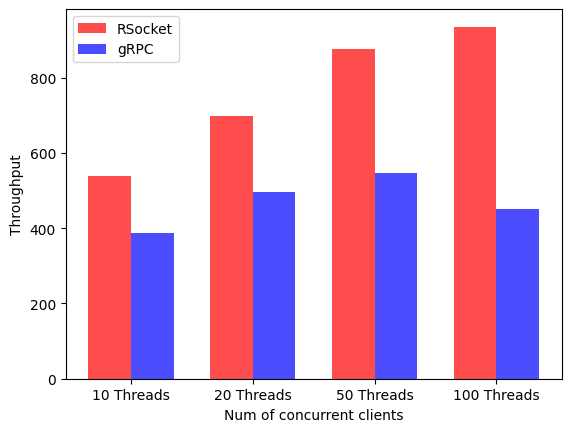

In [200]:
draw_throughput_chart(rsocket_db_throughput, grpc_db_throughput, db_thread_stats)

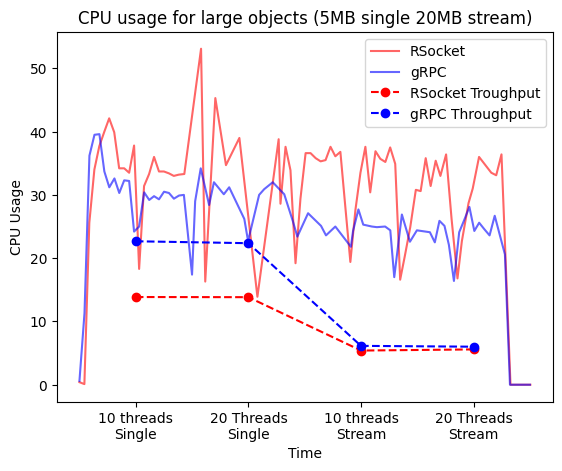

In [201]:
draw_cpu_chart(
    rsocket_sized_cpu,
    grpc_sized_cpu,
    rsocket_sized_throughput,
    grpc_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="CPU usage for large objects (5MB single 20MB stream)"
)

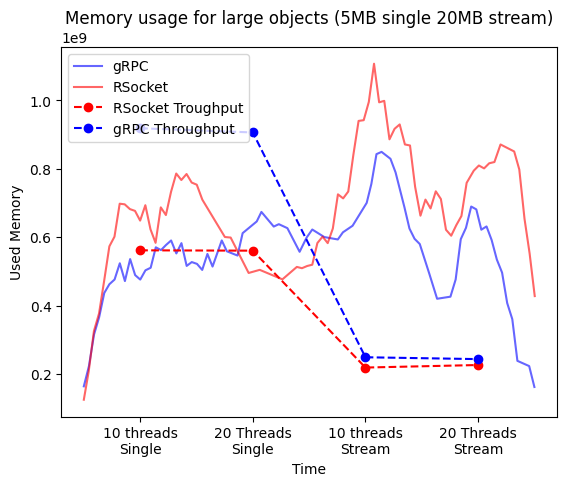

In [202]:
draw_mem_chart(
    rsocket_sized_mem,
    grpc_sized_mem,
    rsocket_throughput= rsocket_sized_throughput,
    grpc_throughput= grpc_sized_throughput,
    throughput_labels=[
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Memory usage for large objects (5MB single 20MB stream)"
)

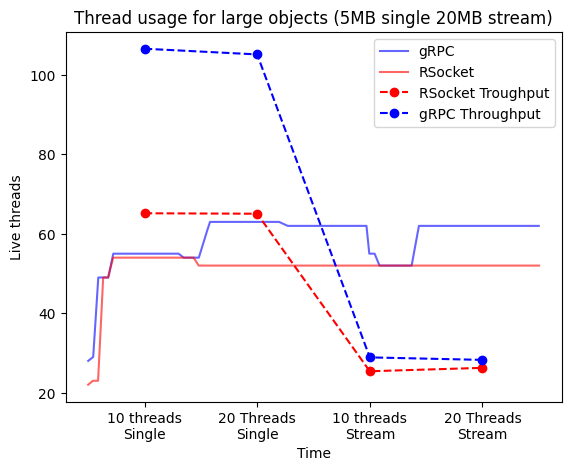

In [203]:
draw_thread_chart(
    rsocket_sized_thread,
    grpc_sized_thread,
    rsocket_sized_throughput,
    grpc_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Thread usage for large objects (5MB single 20MB stream)"
)

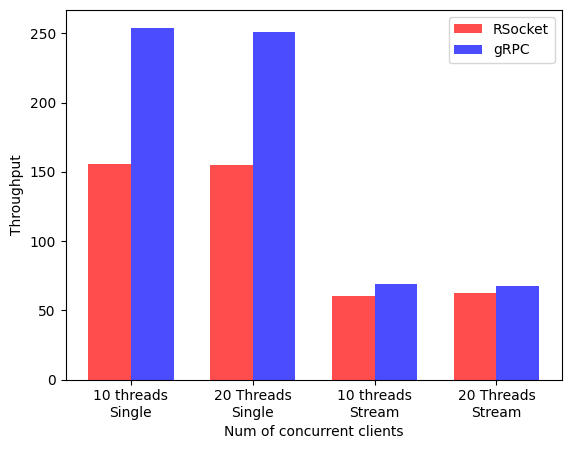

In [204]:
draw_throughput_chart(
    rsocket_sized_throughput,
    grpc_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
)

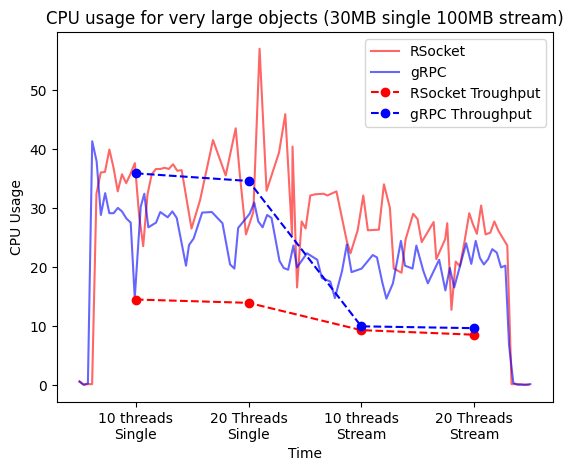

In [205]:
draw_cpu_chart(
    rsocket_large_sized_cpu,
    grpc_large_sized_cpu,
    rsocket_large_sized_throughput,
    grpc_large_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="CPU usage for very large objects (30MB single 100MB stream)"
)

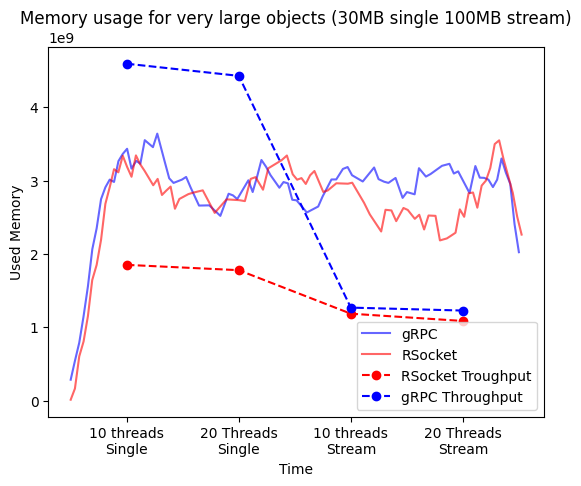

In [206]:
draw_mem_chart(
    rsocket_large_sized_mem,
    grpc_large_sized_mem,
    rsocket_throughput= rsocket_large_sized_throughput,
    grpc_throughput= grpc_large_sized_throughput,
    throughput_labels=[
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Memory usage for very large objects (30MB single 100MB stream)"
)

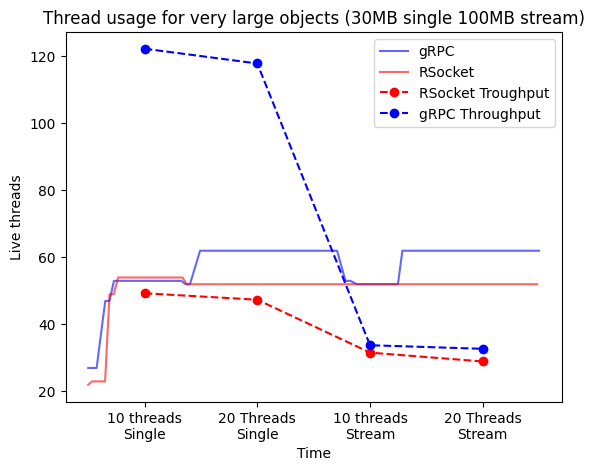

In [207]:
draw_thread_chart(
    rsocket_large_sized_thread,
    grpc_large_sized_thread,
    rsocket_large_sized_throughput,
    grpc_large_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Thread usage for very large objects (30MB single 100MB stream)"
)

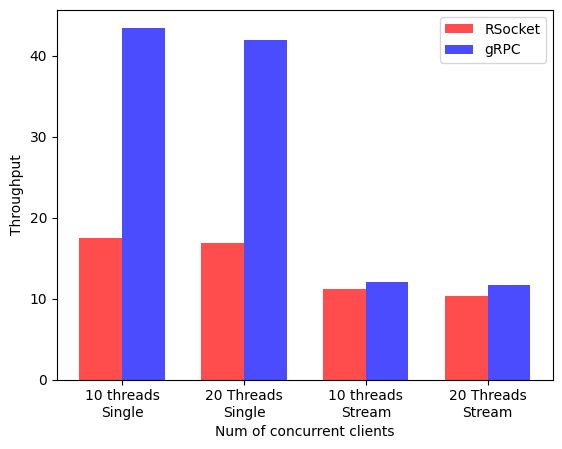

In [208]:
draw_throughput_chart(
    rsocket_large_sized_throughput,
    grpc_large_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
)

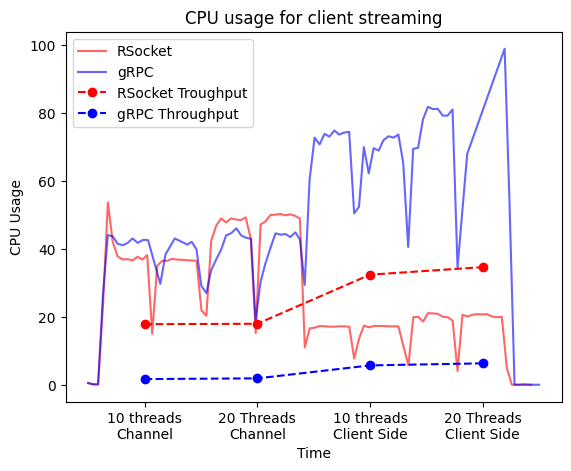

In [217]:
draw_cpu_chart(
    rsocket_clients_cpu,
    grpc_clients_cpu,
    rsocket_clients_throughput,
    grpc_clients_throughput,
    [
        "10 threads\nChannel",
        "20 Threads\nChannel",
        "10 threads\nClient Side",
        "20 Threads\nClient Side",
    ],
    title="CPU usage for client streaming"
)

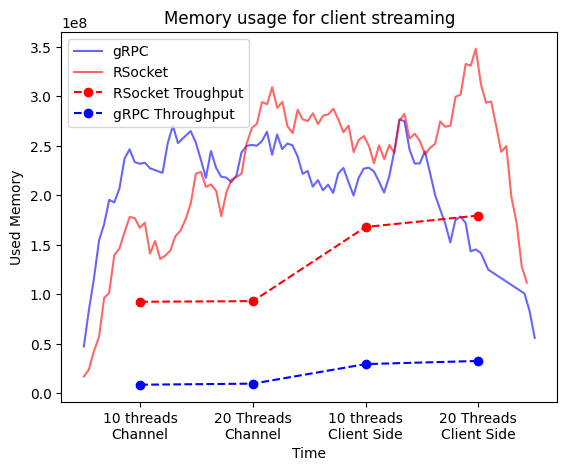

In [210]:
draw_mem_chart(
    rsocket_clients_mem,
    grpc_clients_mem,
    rsocket_throughput= rsocket_clients_throughput,
    grpc_throughput= grpc_clients_throughput,
    throughput_labels=[
        "10 threads\nChannel",
        "20 Threads\nChannel",
        "10 threads\nClient Side",
        "20 Threads\nClient Side",
    ],
    title="Memory usage for client streaming"
)

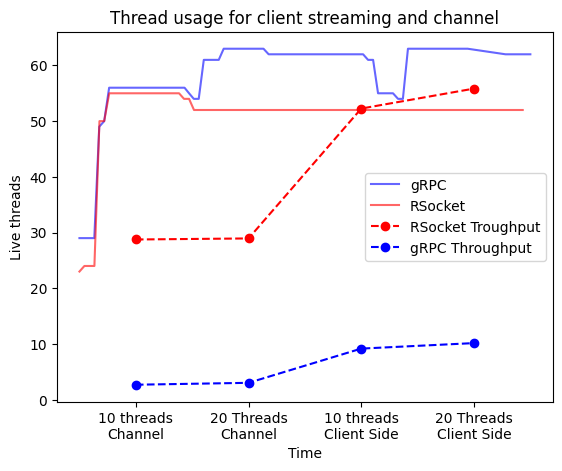

In [211]:
draw_thread_chart(
    rsocket_clients_thread,
    grpc_clients_thread,
    rsocket_clients_throughput,
    grpc_clients_throughput,
    [
        "10 threads\nChannel",
        "20 Threads\nChannel",
        "10 threads\nClient Side",
        "20 Threads\nClient Side",
    ],
    title="Thread usage for client streaming and channel"
)

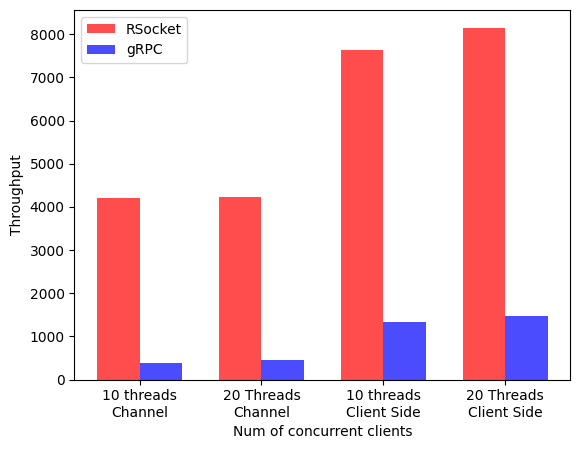

In [212]:
draw_throughput_chart(
    rsocket_clients_throughput,
    grpc_clients_throughput,
    [
        "10 threads\nChannel",
        "20 Threads\nChannel",
        "10 threads\nClient Side",
        "20 Threads\nClient Side",
    ],
)

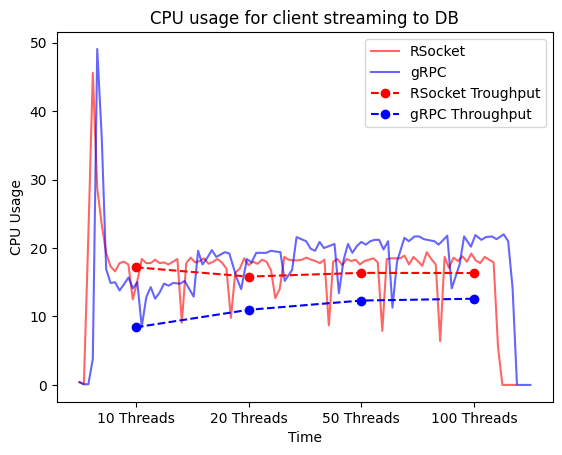

In [213]:
draw_cpu_chart(
    rsocket_db_clients_cpu,
    grpc_db_clients_cpu,
    rsocket_db_clients_throughput,
    grpc_db_clients_throughput,
    ["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="CPU usage for client streaming to DB"
)

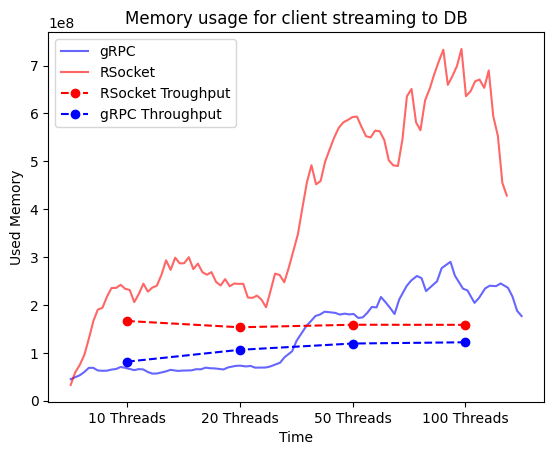

In [214]:
draw_mem_chart(
    rsocket_db_clients_mem,
    grpc_db_clients_mem,
    rsocket_throughput= rsocket_db_clients_throughput,
    grpc_throughput= grpc_db_clients_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Memory usage for client streaming to DB"
)

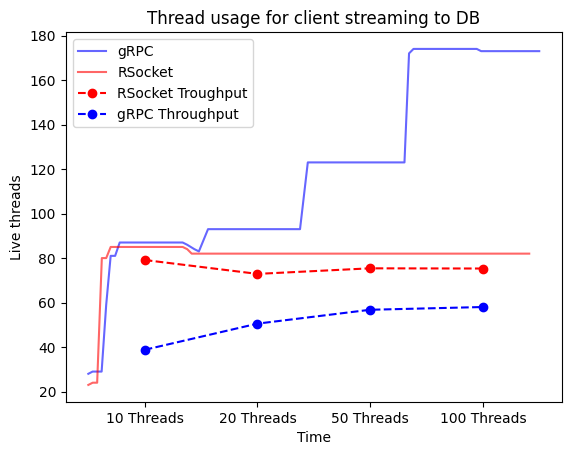

In [215]:
draw_thread_chart(
    rsocket_db_clients_thread,
    grpc_db_clients_thread,
    rsocket_db_clients_throughput,
    grpc_db_clients_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Thread usage for client streaming to DB"
)

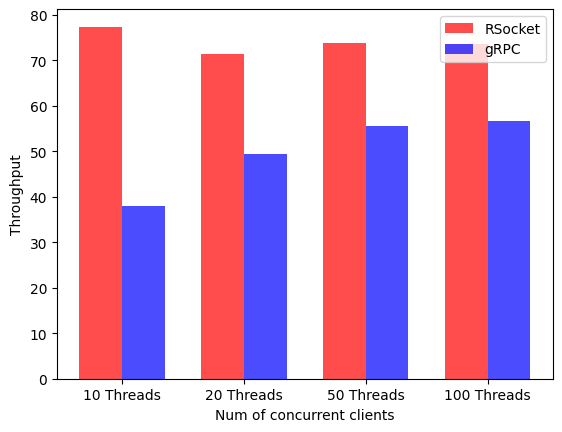

In [216]:
draw_throughput_chart(
    rsocket_db_clients_throughput,
    grpc_db_clients_throughput,
    thread_stats=["10 Threads", "20 Threads", "50 Threads", "100 Threads"]
)